# Notebook for tokenizer evaluation

In [21]:
from tokenizer_evaluator.tokenizer_eval import TokenizerEvaluator

%load_ext autoreload
%autoreload 2

In [22]:
#tok_eval = TokenizerEvaluator(fertility_dataset="HuggingFaceFW/fineweb-2", fertility_split="test", fertility_subset="ces_Latn", parity_split="test")
tok_eval = TokenizerEvaluator(fertility_dataset="BUT-FIT/BUT-LCC", fertility_split="test", parity_split="test")

README.md:   0%|          | 0.00/5.90k [00:00<?, ?B/s]

Loading dataset from disk:   0%|          | 0/22 [00:00<?, ?it/s]

In [7]:
len(model_ids)

58

In [ ]:
model_ids = ["meta-llama/Llama-3.3-70B-Instruct",
             "meta-llama/Llama-3.2-1B", 
             "meta-llama/Llama-3.2-3B", 
             "meta-llama/Llama-3.1-8B", 
             "meta-llama/Llama-3.1-70B", 
             "meta-llama/Llama-3.1-405B",
             "meta-llama/Meta-Llama-3-8B",
             "meta-llama/Meta-Llama-3-70B",
            #  "meta-llama/Llama-2-7b-hf",
            #  "meta-llama/Llama-2-13b-hf",
            #  "meta-llama/Llama-2-70b-hf",
             "CohereForAI/aya-expanse-8b", 
             "CohereForAI/aya-expanse-32b",
             "CohereForAI/aya-23-8B",
             "CohereForAI/aya-23-35B",
             "CohereForAI/aya-101",
             "CohereForAI/c4ai-command-r-v01", 
             "CohereForAI/c4ai-command-r-08-2024", 
             "CohereForAI/c4ai-command-r-plus", 
             "CohereForAI/c4ai-command-r-plus-08-2024",
             "CohereLabs/c4ai-command-r7b-12-2024",
             "CohereLabs/c4ai-command-a-03-2025",
             "mistralai/Ministral-8B-Instruct-2410",
             "mistralai/Mistral-7B-v0.1",
             "mistralai/Mistral-7B-v0.3", 
             "mistralai/Mixtral-8x7B-Instruct-v0.1",
             "mistralai/Mixtral-8x22B-v0.1",
             "mistralai/Mistral-Large-Instruct-2407",
             "mistralai/Mistral-Large-Instruct-2411",
             "google/gemma-3-27b-pt",
             "google/gemma-3-12b-pt",
             "google/gemma-3-1b-pt",
             "google/gemma-3-4b-pt",
             "google/gemma-2-2b",
             "google/gemma-2-9b",
             "google/gemma-2-27b",
             "google/gemma-2b",
             "google/gemma-7b",
             "ibm-granite/granite-3.0-8b-base",
             "ibm-granite/granite-3.0-2b-base",
             "ibm-granite/granite-3.2-8b-instruct",
             "ibm-granite/granite-3.2-2b-instruct",
             "ibm-granite/granite-3.1-8b-base",
             "ibm-granite/granite-3.1-2b-base",
             "ibm-granite/granite-3.1-3b-a800m-base",
             "ibm-granite/granite-3.1-1b-a400m-base",
             "BUT-FIT/csmpt7b",
             "BUT-FIT/CSTinyLlama-1.2B",
             "openGPT-X/Teuken-7B-instruct-research-v0.4",
             "openGPT-X/Teuken-7B-instruct-commercial-v0.4",
             "utter-project/EuroLLM-1.7B",
             "utter-project/EuroLLM-9B",
             "BSC-LT/ALIA-40b",
             "BSC-LT/salamandra-7b",
             "BSC-LT/salamandra-2b",
             "gpt-4o",
             "gpt-4",
             "gpt-3.5-turbo",
             "gpt-2",
             ]

In [23]:
model_ids = ["meta-llama/Llama-3.1-8B", "/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M"]

In [24]:
results = tok_eval.evaluate(model_ids, verbose=True)

Found 2 unique tokenizers
Evaluating tokenizer meta-llama/Llama-3.1-8B


20000it [00:25, 775.77it/s]


Evaluating tokenizer /home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M


20000it [00:27, 735.77it/s]


In [25]:
results

{'meta-llama/Llama-3.1-8B': {'fertility': 2.0988014611163774,
  'parity': 1.4206662400380612,
  'all_models': ['meta-llama/Llama-3.1-8B']},
 '/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M': {'fertility': 2.277250895086873,
  'parity': 1.3523253268034574,
  'all_models': ['/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M']}}

In [5]:
import pandas as pd

df_results = pd.DataFrame(results)
#switch axes (rows become columns and vice versa)
df_results = df_results.transpose()
df_results = df_results.reset_index()
df_results.rename(columns={"index": "model_id"}, inplace=True)
df_results


,model_id,fertility,parity,all_models
0,meta-llama/Llama-3.1-8B,2.10293,1.420666,[meta-llama/Llama-3.1-8B]
1,/home/mlynatom/master-thesis-repository-tomas-...,2.271002,1.352325,[/home/mlynatom/master-thesis-repository-tomas...


In [6]:
df_results.to_csv("/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizer_evaluator/results_new_thesis_adapt.csv", index=False)

In [11]:
df_results = pd.read_csv("/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizer_evaluator/results_new_thesis_adapt.csv")

In [12]:
#round parity and fertility to 3 decimal places
df_results["parity"] = df_results["parity"].round(3)
df_results["fertility"] = df_results["fertility"].round(3)

In [13]:
#group also if the models have both the same fertility and parity and same prefix in model id -> in such case take the group name as the first model id and merge all_models
df_results["company"] = df_results["model_id"].apply(lambda x: x.split("/")[0])
df_results = df_results.groupby(["fertility", "parity"]).agg({"model_id": list, "all_models": list})

In [14]:
#display all values in column model_id
pd.set_option('display.max_colwidth', None)
df_results

,,model_id,all_models
fertility,parity,,
2.103,1.421,[meta-llama/Llama-3.1-8B],[['meta-llama/Llama-3.1-8B']]
2.271,1.352,[/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M],[['/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M']]


In [15]:
#rename the model_ids according to the following mapping
model_id2family = {"BUT-FIT/csmpt7b": "BUT-FIT",
                   "CohereForAI/aya-expanse-8b": "Aya Expanse, 23 + Command-R, A",
                   "CohereForAI/aya-101": "Aya 101",
                   "Qwen/Qwen2-0.5B": "Qwen 1.5, 2, 2.5",
                   "allenai/OLMo-2-1124-7B": "Allenai Olmo",
                   "google/gemma-2-2b": "Google Gemma 2",
                   "google/gemma-3-27b-pt": "Google Gemma 3",
                    "ibm-granite/granite-3.0-8b-base": "IBM Granite 3.0, 3.1, 3.2",
                    #"ibm-granite/granite-3.2-8b-instruct": "IBM Granite 3.2",
                    "meta-llama/Llama-3.3-70B-Instruct": "Meta Llama 3, 3.1, 3.2, 3.3",
                    "meta-llama/Llama-2-7b-hf": "Meta Llama 2",
                    "mistralai/Ministral-8B-Instruct-2410": "Mistral Ministral",
                    "mistralai/Mistral-Large-Instruct-2407": "Mistral Large",
                    "mistralai/Mistral-7B-v0.1": "Mistral + Mixtral",
                    "openGPT-X/Teuken-7B-instruct-research-v0.4": "Teuken",
                    "BSC-LT/ALIA-40b": "Salamandra & ALIA",
                    "utter-project/EuroLLM-1.7B": "EuroLLM",
                    "gpt-4o": "GPT-4o",
                    "gpt-2": "GPT-2",
                    "gpt-3.5-turbo": "GPT-3.5, 4",
                    "/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M": "Vocabulary adapted tokenizer"
                   }

In [16]:
def lambda_func(x):
    for model_id in x:
        if model_id in model_id2family:
            return model_id2family[model_id]
    return model_id


df_results["family"] = df_results["model_id"].apply(lambda_func)
df_results

,,model_id,all_models,family
fertility,parity,,,
2.103,1.421,[meta-llama/Llama-3.1-8B],[['meta-llama/Llama-3.1-8B']],meta-llama/Llama-3.1-8B
2.271,1.352,[/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M],[['/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M']],Vocabulary adapted tokenizer


In [17]:
#sort
df_results = df_results.sort_values(by="family", ascending=True, kind="stable")
df_results = df_results.sort_values(by="parity", ascending=True, kind="stable")
df_results = df_results.sort_values(by="fertility", ascending=True, kind="stable")
df_results

,,model_id,all_models,family
fertility,parity,,,
2.103,1.421,[meta-llama/Llama-3.1-8B],[['meta-llama/Llama-3.1-8B']],meta-llama/Llama-3.1-8B
2.271,1.352,[/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M],[['/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M']],Vocabulary adapted tokenizer


In [18]:
df_results.reset_index(inplace=True)

In [19]:
df_results

,fertility,parity,model_id,all_models,family
0,2.103,1.421,[meta-llama/Llama-3.1-8B],[['meta-llama/Llama-3.1-8B']],meta-llama/Llama-3.1-8B
1,2.271,1.352,[/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M],[['/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M']],Vocabulary adapted tokenizer


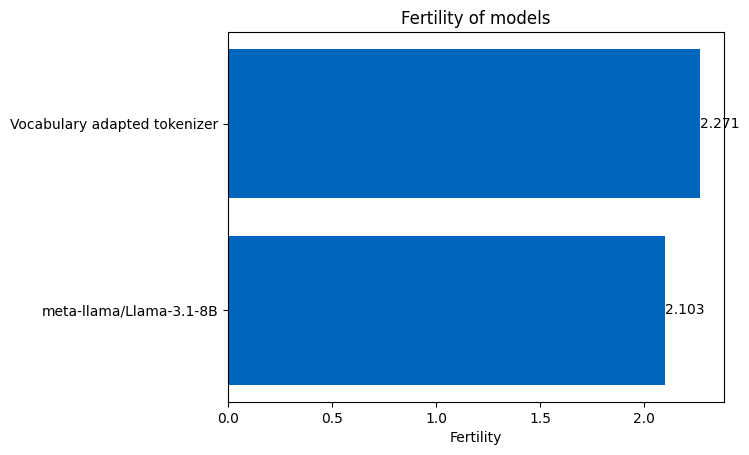

In [ ]:
# plot fertility with values for each bar in greyscale
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (11, 5)
ax.barh(df_results["family"], df_results["fertility"], color="#0065BD")
#make sure the label is inside the box
for i, v in enumerate(df_results["fertility"]):
    ax.text(v, i, str(round(v, 3)), color='black', va='center')
ax.set_xlabel('Fertility')
ax.set_title('Fertility of models')

plt.savefig("/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizer_evaluator/fertility_new_adapt.pdf", bbox_inches='tight')
plt.show()

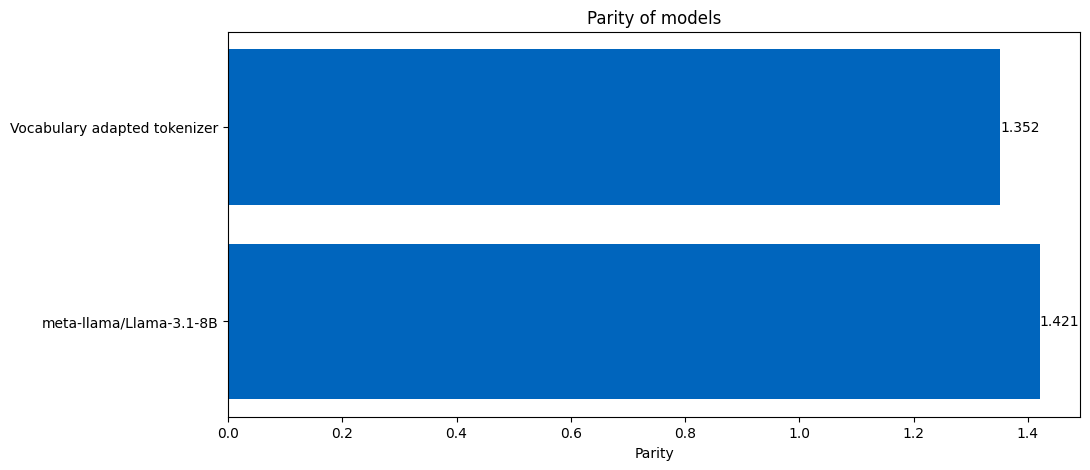

In [21]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (11, 5)
ax.barh(df_results["family"], df_results["parity"], color="#0065BD")
for i, v in enumerate(df_results["parity"]):
    ax.text(v, i, str(round(v, 3)), color='black', va='center')
ax.set_xlabel('Parity')
ax.set_title('Parity of models')
plt.savefig("/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizer_evaluator/parity_new_adapt.pdf", bbox_inches='tight')
plt.show()


In [62]:
# make a typst text of the family to all models overview
#make single list of all models for each row (without duplicates)
df_results["all_models"] = df_results["all_models"].apply(lambda x: list(set([item for sublist in x for item in sublist])))

#extract texts in format "family: all_models" for each row
def lambda_func(x):
    return x["family"] + ": " + ", ".join(x["all_models"])

df_results["family_all_models"] = df_results.apply(lambda_func, axis=1)
df_results

,company,fertility,parity,model_id,all_models,family,family_all_models
0,BUT-FIT,1.424353,0.717209,[BUT-FIT/csmpt7b],"[BUT-FIT/Czech-GPT-2-XL-133k, BUT-FIT/csmpt7b, BUT-FIT/CSTinyLlama-1.2B]",BUT-FIT,"BUT-FIT: BUT-FIT/Czech-GPT-2-XL-133k, BUT-FIT/csmpt7b, BUT-FIT/CSTinyLlama-1.2B"
1,CohereForAI,1.889045,1.333089,"[CohereForAI/aya-expanse-8b, CohereForAI/c4ai-command-r-08-2024]","[CohereForAI/c4ai-command-r-v01, CohereForAI/c4ai-command-r-plus-08-2024, CohereForAI/c4ai-command-r-08-2024, CohereForAI/aya-23-8B, CohereForAI/aya-expanse-32b, CohereForAI/aya-expanse-8b, CohereForAI/c4ai-command-r-plus, CohereForAI/aya-23-35B]","Aya Expanse, 23 + Command-R","Aya Expanse, 23 + Command-R: CohereForAI/c4ai-command-r-v01, CohereForAI/c4ai-command-r-plus-08-2024, CohereForAI/c4ai-command-r-08-2024, CohereForAI/aya-23-8B, CohereForAI/aya-expanse-32b, CohereForAI/aya-expanse-8b, CohereForAI/c4ai-command-r-plus, CohereForAI/aya-23-35B"
2,meta-llama,2.098801,1.420666,"[meta-llama/Llama-3.3-70B-Instruct, meta-llama/Meta-Llama-3-8B]","[meta-llama/Llama-3.1-405B, meta-llama/Meta-Llama-3-70B, meta-llama/Meta-Llama-3-8B, meta-llama/Llama-3.2-1B, meta-llama/Llama-3.3-70B-Instruct, meta-llama/Llama-3.2-3B, meta-llama/Llama-3.1-70B, meta-llama/Llama-3.1-8B]","Meta Llama 3.0, 3.1, 3.2, 3.3","Meta Llama 3.0, 3.1, 3.2, 3.3: meta-llama/Llama-3.1-405B, meta-llama/Meta-Llama-3-70B, meta-llama/Meta-Llama-3-8B, meta-llama/Llama-3.2-1B, meta-llama/Llama-3.3-70B-Instruct, meta-llama/Llama-3.2-3B, meta-llama/Llama-3.1-70B, meta-llama/Llama-3.1-8B"
3,google,2.105951,1.357283,[google/gemma-2-2b],"[google/gemma-2-2b, google/gemma-2-9b, google/gemma-2b, google/gemma-7b, google/gemma-2-27b]",Google Gemma,"Google Gemma: google/gemma-2-2b, google/gemma-2-9b, google/gemma-2b, google/gemma-7b, google/gemma-2-27b"
4,gpt-4o,2.187530,1.496300,[gpt-4o],[gpt-4o],gpt-4o,gpt-4o: gpt-4o
5,CohereForAI,2.192861,1.231120,[CohereForAI/aya-101],[CohereForAI/aya-101],Aya 101,Aya 101: CohereForAI/aya-101
6,mistralai,2.252395,1.496156,[mistralai/Ministral-8B-Instruct-2410],[mistralai/Ministral-8B-Instruct-2410],Mistral Ministral,Mistral Ministral: mistralai/Ministral-8B-Instruct-2410
7,meta-llama,2.717826,1.545938,[meta-llama/Llama-2-7b-hf],"[meta-llama/Llama-2-13b-hf, meta-llama/Llama-2-7b-hf, meta-llama/Llama-2-70b-hf]",Meta Llama 2,"Meta Llama 2: meta-llama/Llama-2-13b-hf, meta-llama/Llama-2-7b-hf, meta-llama/Llama-2-70b-hf"
8,mistralai,2.873051,1.655725,"[mistralai/Mistral-7B-v0.1, mistralai/Mistral-7B-v0.3]","[mistralai/Mixtral-8x7B-Instruct-v0.1, mistralai/Mistral-7B-v0.1, mistralai/Mistral-7B-v0.3, mistralai/Mixtral-8x22B-v0.1]",Mistral Mistral + Mixtral,"Mistral Mistral + Mixtral: mistralai/Mixtral-8x7B-Instruct-v0.1, mistralai/Mistral-7B-v0.1, mistralai/Mistral-7B-v0.3, mistralai/Mixtral-8x22B-v0.1"
9,mistralai,2.873653,1.655031,"[mistralai/Mistral-Large-Instruct-2407, mistralai/Mistral-Large-Instruct-2411]","[mistralai/Mistral-Large-Instruct-2411, mistralai/Mistral-Large-Instruct-2407]",Mistral Large,"Mistral Large: mistralai/Mistral-Large-Instruct-2411, mistralai/Mistral-Large-Instruct-2407"


In [63]:
print("\n".join(df_results["family_all_models"]))

BUT-FIT: BUT-FIT/Czech-GPT-2-XL-133k, BUT-FIT/csmpt7b, BUT-FIT/CSTinyLlama-1.2B
Aya Expanse, 23 + Command-R: CohereForAI/c4ai-command-r-v01, CohereForAI/c4ai-command-r-plus-08-2024, CohereForAI/c4ai-command-r-08-2024, CohereForAI/aya-23-8B, CohereForAI/aya-expanse-32b, CohereForAI/aya-expanse-8b, CohereForAI/c4ai-command-r-plus, CohereForAI/aya-23-35B
Meta Llama 3.0, 3.1, 3.2, 3.3: meta-llama/Llama-3.1-405B, meta-llama/Meta-Llama-3-70B, meta-llama/Meta-Llama-3-8B, meta-llama/Llama-3.2-1B, meta-llama/Llama-3.3-70B-Instruct, meta-llama/Llama-3.2-3B, meta-llama/Llama-3.1-70B, meta-llama/Llama-3.1-8B
Google Gemma: google/gemma-2-2b, google/gemma-2-9b, google/gemma-2b, google/gemma-7b, google/gemma-2-27b
gpt-4o: gpt-4o
Aya 101: CohereForAI/aya-101
Mistral Ministral: mistralai/Ministral-8B-Instruct-2410
Meta Llama 2: meta-llama/Llama-2-13b-hf, meta-llama/Llama-2-7b-hf, meta-llama/Llama-2-70b-hf
Mistral Mistral + Mixtral: mistralai/Mixtral-8x7B-Instruct-v0.1, mistralai/Mistral-7B-v0.1, mistra

## Process Czeng to HF Datasets format

In [1]:
from datasets import DatasetDict, Dataset
from typing import List, Dict

In [2]:
def read_mff_tsv(file_path) -> List[Dict[str, str]]:
    test_file = []
    with open(file_path, "r") as f:
        for line in f:
            row = line.strip().split("\t")

            #if empty row read
            if len(row) == 1 and row[0] == "":
                continue

            assert(len(row) == 6)

            tmp_entry = {"id":row[0].strip(), "text_cs": row[4].strip(), "text_en": row[5].strip()}
            test_file.append(tmp_entry)

    return test_file

In [3]:
test_data = read_mff_tsv("/mnt/data/factcheck/czeng20/czeng20-test")
train_data = read_mff_tsv("/mnt/data/factcheck/czeng20/czeng20-train")

In [4]:
hf_dataset = DatasetDict(
    {
        "train": Dataset.from_list(train_data),
        "test": Dataset.from_list(test_data)
    }
)

In [5]:
hf_dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text_cs', 'text_en'],
        num_rows: 60980645
    })
    test: Dataset({
        features: ['id', 'text_cs', 'text_en'],
        num_rows: 492596
    })
})

In [6]:
hf_dataset.save_to_disk("/mnt/data/factcheck/czeng20/hf_dataset/")

Saving the dataset (0/22 shards):   0%|          | 0/60980645 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/492596 [00:00<?, ? examples/s]

# Inspect tokenizes

In [1]:
from transformers import AutoTokenizer

tokenizer1 = AutoTokenizer.from_pretrained("/home/mlynatom/master-thesis-repository-tomas-mlynar/tokenizers/llama-3.1-8B-cs_expand_5M")
tokenizer2 = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B")


In [18]:
text = "Fenomén japonských videoheren nemilosrdně umírá. Omrkněte poslední stroje, zachraňuje je i Čech"

In [28]:
print("num_tokens: ", len(tokenizer1.encode(text)))
for  token in tokenizer1.encode(text):
    print(token, tokenizer1.decode(token))

num_tokens:  36
128000 <|begin_of_text|>
37 F
133281 enom
10610 én
503  j
26862 apons
127777 kých
2835  video
1964 her
268 en
24566  nem
90419 ilos
6634 rd
100292 ně
4543  um
2483 í
38468 rá
13 .
19116  Om
81 r
19639 kn
22161 ě
668 te
3273  po
128493 sle
17851 dn
2483 í
220  
132523 stroje
11 ,
15036  za
129784 chra
107944 ňuje
4864  je
602  i
115899  Čech


In [29]:
print("num_tokens", len(tokenizer2.encode(text)))
for token in tokenizer2.encode(text):
    print(token, tokenizer2.decode(token))

num_tokens 34
128000 <|begin_of_text|>
37 F
268 en
316 om
10610 én
503  j
26862 apons
127777 kých
2835  video
1964 her
268 en
24566  nem
90419 ilos
6634 rd
100292 ně
4543  um
2483 í
38468 rá
13 .
19116  Om
81 r
19639 kn
22161 ě
668 te
111727  poslední
31511  stro
3841 je
11 ,
97912  zach
969 ra
107944 ňuje
4864  je
602  i
115899  Čech
